In [147]:
#!pip install plotly
!pip install statsmodels

In [1]:
import numpy as np
import plotly.express as px
import seaborn as sns

from scipy.stats import zscore

## Data Files

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# minimum size of acceptable segment
min_days = pd.to_timedelta(5*365, unit='D')
max_gaps = 0   # not implemented

#wells with >= min_days of contiguous data
valid_wells_output = 'C:/Users/leygr/Desktop/210/Continuous/valid_wells.csv'
#daily measurements in Central Valley
CV_daily_data = 'c:/users/leygr/desktop/210/continuous/CV-measurements-daily.csv'

# read daily measurement data
filename = "C:/Users/leygr/Desktop/210/Continuous/gwl-daily.csv"
daily_data = pd.read_csv(filename)
#daily_data.head()
daily_data.shape

(2300852, 12)

In [3]:
daily_data.iloc[:20]

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-04-30,9.1,1,6.9,1,17.354,1,15.154,1,-8.254,1
1,01N04E36Q001M,2005-05-01,9.1,1,6.9,1,17.348,1,15.148,1,-8.248,1
2,01N04E36Q001M,2005-05-02,9.1,1,6.9,1,17.343,1,15.143,1,-8.243,1
3,01N04E36Q001M,2005-05-03,9.1,1,6.9,1,17.358,1,15.158,1,-8.258,1
4,01N04E36Q001M,2005-05-04,9.1,1,6.9,1,17.354,1,15.154,1,-8.254,1
5,01N04E36Q001M,2005-05-05,9.1,1,6.9,1,17.319,1,15.119,1,-8.219,1
6,01N04E36Q001M,2005-05-06,9.1,1,6.9,1,17.314,1,15.114,1,-8.214,1
7,01N04E36Q001M,2005-05-07,9.1,1,6.9,1,17.322,1,15.122,1,-8.222,1
8,01N04E36Q001M,2005-05-08,9.1,1,6.9,1,17.303,1,15.103,1,-8.203,1
9,01N04E36Q001M,2005-05-09,9.1,1,6.9,1,17.269,1,15.069,1,-8.169,1


In [4]:

#read stations data
filename = "C:/Users/leygr/Desktop/210/Continuous/gwl-stations.csv"

stations_data = pd.read_csv(filename)
stations_data.head()


,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft bgs,MRL-2W,37.886056,-121.481833,NAD83,"Survey, 1m",6.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft bgs,MRL-3W,37.884861,-121.482167,NAD83,"Survey, 1m",-1.0,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q002M is part of a well cluster. Othe...
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bgs,MLNO-2,37.886028,-121.481917,NAD83,"Survey, 1m",8.6,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q003M is part of a well cluster. Othe...
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bgs,MLNO-1,37.885028,-121.482000,NAD83,"Survey, 1m",15.9,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q004M is part of a well cluster. Othe...
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,"Survey, 1m",16.1,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01S04E28F001M is part of a well cluster. Othe...


# CNRA Continuous Well Data
_CNRA data available at:_ https://data.cnra.ca.gov/dataset/continuous-groundwater-level-measurements

#### Extract basin code in Central Valley

Need to deal with BLANKS later

In [5]:
central_valley = stations_data.loc[[(isinstance(s, str) and (s[:5] in ["5-006","5-021",'5-022'])) for s in stations_data["BASIN_CODE"]]]

In [6]:
central_valley

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,ELEVACC,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT
0,01N04E36Q001M,378861N1214818W001,Middle River Barrier well 2W screen 61-81 ft bgs,MRL-2W,37.886056,-121.481833,NAD83,"Survey, 1m",6.90,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,81.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q001M is part of a well cluster. Othe...
1,01N04E36Q002M,378849N1214822W001,Middle River Barrier well 3W screen 14-34 ft bgs,MRL-3W,37.884861,-121.482167,NAD83,"Survey, 1m",-1.00,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q002M is part of a well cluster. Othe...
2,01N04E36Q003M,378860N1214819W001,Middle River Barrier well 2 screen 10-20 ft bgs,MLNO-2,37.886028,-121.481917,NAD83,"Survey, 1m",8.60,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q003M is part of a well cluster. Othe...
3,01N04E36Q004M,378850N1214820W001,Middle River Barrier well 1 screen 10-20 ft bgs,MLNO-1,37.885028,-121.482000,NAD83,"Survey, 1m",15.90,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,20.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01N04E36Q004M is part of a well cluster. Othe...
4,01S04E28F001M,378186N1215443W001,Grant Line Canal Barrier well 2W screen 10-25 ...,GLWL-2W,37.818556,-121.544333,NAD83,"Survey, 1m",16.10,NaN,R.L. AT SURFACE,San Joaquin,5-022.15,Tracy,25.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,01S04E28F001M is part of a well cluster. Othe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,387485N1216339W002,387485N1216339W002,Yolo Bypass Hydrogeologic Study Well 2B2 scr: ...,YBHC-2B2,38.748543,-121.633933,NAD83,"Survey, 1m",29.36,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,55.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
483,387628N1216350W001,387628N1216350W001,Yolo Bypass Hydrogeologic Study Well 1B1 scr: ...,YBHC-1B1,38.762794,-121.635012,NAD83,"Survey, 1m",31.44,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,30.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
484,387628N1216350W002,387628N1216350W002,Yolo Bypass Hydrogeologic Study Well 1B2 scr: ...,YBHC-1B2,38.762809,-121.635026,NAD83,"Survey, 1m",31.66,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,50.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN
485,387630N1216336W001,387630N1216336W001,Yolo Bypass Hydrogeologic Study Well 1C1 scr: ...,YBHC-1C1,38.762977,-121.633602,NAD83,"Survey, 1m",32.59,NAVD88,R.L. AT SURFACE,Yolo,5-021.67,Yolo,34.0,Observation,Single Well,NaN,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN


#### Next 3 cells not used

In [7]:
### San Joaquin Valley
central_valley_5022 = stations_data.loc[[(isinstance(s, str) and (s[:5] in ['5-022'])) for s in stations_data["BASIN_CODE"]]]
central_valley_5022.shape
central_valley_5022_site_codes = set(daily_data.STATION).intersection(set(central_valley_5022.STATION))

In [8]:
#Sacramento Valley
central_valley_5021 = stations_data.loc[[(isinstance(s, str) and (s[:5] in ['5-021'])) for s in stations_data["BASIN_CODE"]]]
central_valley_5021.shape
central_valley_5021_site_codes = set(daily_data.STATION).intersection(set(central_valley_5021.STATION))

In [9]:
#Redding Area
central_valley_5006 = stations_data.loc[[(isinstance(s, str) and (s[:5] in ['5-006'])) for s in stations_data["BASIN_CODE"]]]
central_valley_5006.shape
central_valley_5006_site_codes = set(daily_data.STATION).intersection(set(central_valley_5006.STATION))

### Extract measurements in Central Valley

In [10]:
#extract all stations in daily data that are in central valley station data
daily_central_valley_site_codes = set(daily_data.STATION).intersection(set(central_valley.STATION))

In [11]:
#monthly_central_valley_site_codes
len(daily_central_valley_site_codes)


464

In [12]:
#extract all data from daily_data that have a station in monthly_central valley site code
mm_cv = daily_data.loc[[STATION in daily_central_valley_site_codes for STATION in daily_data.STATION]]

In [13]:
mm_cv

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-04-30,9.10,1,6.90,1,17.354,1,15.154,1,-8.254,1
1,01N04E36Q001M,2005-05-01,9.10,1,6.90,1,17.348,1,15.148,1,-8.248,1
2,01N04E36Q001M,2005-05-02,9.10,1,6.90,1,17.343,1,15.143,1,-8.243,1
3,01N04E36Q001M,2005-05-03,9.10,1,6.90,1,17.358,1,15.158,1,-8.258,1
4,01N04E36Q001M,2005-05-04,9.10,1,6.90,1,17.354,1,15.154,1,-8.254,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2261296,387630N1216336W002,2022-01-20,32.46,1,32.62,1,19.037,1,19.197,1,13.423,1
2261297,387630N1216336W002,2022-01-21,32.46,1,32.62,1,19.045,1,19.205,1,13.415,1
2261298,387630N1216336W002,2022-01-22,32.46,1,32.62,1,19.089,1,19.249,1,13.371,1
2261299,387630N1216336W002,2022-01-23,32.46,1,32.62,1,19.161,1,19.321,1,13.299,1


In [14]:

mm_cv.to_csv(CV_daily_data)

In [15]:
mm_cv_meta = pd.DataFrame(columns=['station','size','firstDate','lastDate'])


In [16]:
mm_cv_meta['size'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).size()


mm_cv_meta['firstDate'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).min()
mm_cv_meta['lastDate'] = mm_cv.MSMT_DATE.groupby(mm_cv.STATION).max()
mm_cv_meta['firstDate'] = mm_cv_meta['firstDate'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv_meta['lastDate'] = mm_cv_meta['lastDate'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv_meta['firstYear'] = mm_cv_meta['firstDate'].dt.year
mm_cv_meta['lastYear'] = mm_cv_meta['lastDate'].dt.year
mm_cv_meta
#mm_cv['min']


,station,size,firstDate,lastDate,firstYear,lastYear
STATION,,,,,,
01N04E36Q001M,NaN,5668,2005-04-30,2020-11-04,2005,2020
01N04E36Q002M,NaN,5154,2005-05-28,2019-07-07,2005,2019
01N04E36Q003M,NaN,4818,2006-04-29,2019-07-07,2006,2019
01N04E36Q004M,NaN,4818,2006-04-29,2019-07-07,2006,2019
01S04E28F001M,NaN,5183,2005-04-29,2019-07-07,2005,2019
...,...,...,...,...,...,...
387485N1216339W002,NaN,713,2020-02-12,2022-01-24,2020,2022
387628N1216350W001,NaN,703,2020-02-22,2022-01-24,2020,2022
387628N1216350W002,NaN,703,2020-02-22,2022-01-24,2020,2022


In [17]:
mm_cv_meta['lastYear']

STATION
01N04E36Q001M         2020
01N04E36Q002M         2019
01N04E36Q003M         2019
01N04E36Q004M         2019
01S04E28F001M         2019
                      ... 
387485N1216339W002    2022
387628N1216350W001    2022
387628N1216350W002    2022
387630N1216336W001    2022
387630N1216336W002    2022
Name: lastYear, Length: 464, dtype: int64

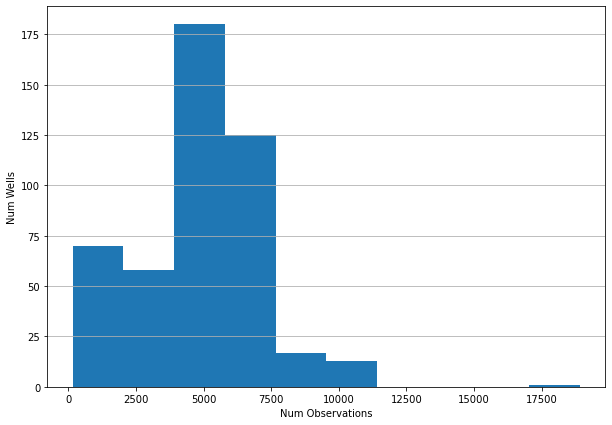

In [18]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(mm_cv_meta['size'])
ax.grid(axis = 'y')
ax.set_ylabel('Num Wells')
ax.set_xlabel("Num Observations")
# Show plot
plt.show()


#### Remove wells with less than 5 * 365 data points

In [19]:

more_than_5 = mm_cv_meta[mm_cv_meta['size'] >= 5*365]
more_than_5['station'] = more_than_5.index
more_than_5

C:\Users\leygr\AppData\Local\Temp/ipykernel_16300/2990198022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_5['station'] = more_than_5.index


,station,size,firstDate,lastDate,firstYear,lastYear
STATION,,,,,,
01N04E36Q001M,01N04E36Q001M,5668,2005-04-30,2020-11-04,2005,2020
01N04E36Q002M,01N04E36Q002M,5154,2005-05-28,2019-07-07,2005,2019
01N04E36Q003M,01N04E36Q003M,4818,2006-04-29,2019-07-07,2006,2019
01N04E36Q004M,01N04E36Q004M,4818,2006-04-29,2019-07-07,2006,2019
01S04E28F001M,01S04E28F001M,5183,2005-04-29,2019-07-07,2005,2019
...,...,...,...,...,...,...
30N04W22F004M,30N04W22F004M,6068,2005-03-05,2021-10-14,2005,2021
30N04W23M001M,30N04W23M001M,6486,2004-06-03,2022-03-06,2004,2022
30N04W23M002M,30N04W23M002M,6486,2004-06-03,2022-03-06,2004,2022


In [20]:
#mm_cv = mm_cv[(mm_cv['STATION'] in list(more_than_5['station'])).any()]
mm_cv = mm_cv.loc[[STATION in more_than_5['station'] for STATION in mm_cv.STATION]]

mm_cv

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-04-30,9.10,1,6.90,1,17.354,1,15.154,1,-8.254,1
1,01N04E36Q001M,2005-05-01,9.10,1,6.90,1,17.348,1,15.148,1,-8.248,1
2,01N04E36Q001M,2005-05-02,9.10,1,6.90,1,17.343,1,15.143,1,-8.243,1
3,01N04E36Q001M,2005-05-03,9.10,1,6.90,1,17.358,1,15.158,1,-8.258,1
4,01N04E36Q001M,2005-05-04,9.10,1,6.90,1,17.354,1,15.154,1,-8.254,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2249616,30N04W25D004M,2022-03-02,471.16,1,472.07,1,74.720,1,75.630,1,396.440,1
2249617,30N04W25D004M,2022-03-03,471.16,1,472.07,1,74.753,1,75.663,1,396.407,1
2249618,30N04W25D004M,2022-03-04,471.16,1,472.07,1,74.842,1,75.752,1,396.318,1
2249619,30N04W25D004M,2022-03-05,471.16,1,472.07,1,74.824,1,75.734,1,396.336,1


In [21]:
col1 = mm_cv["WSE_QC"]
col2 = mm_cv["GSE_WSE_QC"]
correl = col1.corr(col2)
print(correl)
print(col1.mean())
print(col2.mean())

0.9956809349038507
37.477582031617814
37.88259557518807


In [25]:
col1 = mm_cv["WSE"]
col2 = mm_cv["GSE_WSE"]
correl = col1.corr(col2)
print(correl)

0.2474524288234286


In [26]:
# Creating histogram

# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(mm_cv_meta['lastYear'], bins = [2015, 2018, 2019, 2021, 2022])
# ax.grid(axis = 'y')
# ax.set_ylabel('Num Wells')
# ax.set_xlabel("last observation")
# # Show plot
# plt.show()



In [27]:
# Creating histogram
#Over 350 wells have observations in 2022
# recent = mm_cv_meta[mm_cv_meta['lastYear'] == 2022]
# fig, ax = plt.subplots(figsize =(10, 7))
# plt.scatter(mm_cv_meta['firstYear'],mm_cv_meta['lastYear'])
# ax.grid(axis = 'y')
# ax.set_ylabel('last observation')
# ax.set_xlabel("first observation")
# # Show plot
# plt.show()



In [28]:
# Creating histogram
#Over 350 wells have observations in 2022
# recent = mm_cv_meta[mm_cv_meta['lastYear'] == 2022]
# fig, ax = plt.subplots(figsize =(10, 7))
# plt.scatter(recent['firstYear'],recent['size'])
# ax.grid(axis = 'y')
# ax.set_ylabel('Num Wells')
# ax.set_xlabel("first observation")
# # Show plot
# plt.show()



In [29]:
# recent = mm_cv_meta[mm_cv_meta['lastYear'] - mm_cv_meta['firstYear'] >= 5 ]
# recent

In [30]:
mm_cv['sc'] = mm_cv['STATION']

C:\Users\leygr\AppData\Local\Temp/ipykernel_16300/2184366580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_cv['sc'] = mm_cv['STATION']


### Measure data gaps

In [36]:
mm_cv['MSMT_DATE'] = mm_cv['MSMT_DATE'].apply(lambda x : pd.to_datetime(str(x)))
mm_cv['MSMT_DATE']
mm_cv['date'] = mm_cv.loc[:, 'MSMT_DATE']

#### Measure data gaps

C:\Users\leygr\AppData\Local\Temp/ipykernel_16300/2975705581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_cv['MSMT_DATE'] = mm_cv['MSMT_DATE'].apply(lambda x : pd.to_datetime(str(x)))
C:\Users\leygr\AppData\Local\Temp/ipykernel_16300/2975705581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_cv['date'] = mm_cv.loc[:, 'MSMT_DATE']


In [38]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize )
for st in mm_cv['sc'].unique():
    diff1=pd.DataFrame(columns=["sc","date","QC_chg","QC", 'days_btwn'])
    diff1['sc'] = mm_cv.loc[mm_cv['sc'] == st,'sc']
    diff1['date'] = mm_cv.loc[mm_cv['sc'] == st,'date']
    diff1["QC"] = mm_cv.loc[mm_cv['sc'] == st,'WSE_QC']
    diff1["QC_chg"] = mm_cv.loc[mm_cv['sc'] == st,'WSE_QC'].diff(-1)
    diff_gap = diff1[diff1["QC_chg"] != 0.0]
    diff_gap['days_btwn'] = diff_gap['date'].diff()
    diff_gap
#diff_gap['date'].diff(-1)

C:\Users\leygr\AppData\Local\Temp/ipykernel_16300/1429455113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_gap['days_btwn'] = diff_gap['date'].diff()


### Extract 5 year chunks

In [ ]:
import numpy as np
import sys



valid_wells = pd.DataFrame(columns=["sc","last_date","first_date","QC_chg","QC",'days_btwn'])
np.set_printoptions(threshold=sys.maxsize)

for st in mm_cv['sc'].unique():
    diff1=pd.DataFrame(columns=["sc","last_date","first_date","QC_chg","QC", 'days_btwn'])
    diff1['sc'] = mm_cv.loc[mm_cv['sc'] == st,'sc']
    diff1['last_date'] = mm_cv.loc[mm_cv['sc'] == st,'date']
    diff1["QC"] = mm_cv.loc[mm_cv['sc'] == st,'WSE_QC']
    #print(diff1)

    diff1["QC_chg"] = mm_cv.loc[mm_cv['sc'] == st,'WSE_QC'].diff(-1)

    diff_gap = diff1[diff1["QC_chg"] != 0.0]
    diff_gap['days_btwn'] = diff_gap['last_date'].diff()
    diff_gap['first_date'] = diff_gap['last_date'].shift(1)

    # replace NaT with number of days between first date and first gap
    date1 = diff_gap['last_date'].values[diff_gap['days_btwn'].isnull()]
    date0 = diff1['last_date'].values[0]
    diff_gap['first_date'].values[diff_gap['days_btwn'].isnull()] = date0
    diff_gap['days_btwn'].values[diff_gap['days_btwn'].isnull()] = (date1-date0)

    #print(diff_gap)

    #extract segments with size > min_days
    valid_segments = diff_gap[diff_gap['QC'] == 1]
    valid_segments = valid_segments[valid_segments['days_btwn'] > min_days]
    print("\nvalid_segments")
    print(valid_segments)
    valid_wells = valid_wells.append(valid_segments,ignore_index = True)

In [48]:
valid_wells.to_csv(valid_wells_output)

In [41]:
y = mm_cv.loc[mm_cv['sc']==st, 'WSE']
plt.figure(figsize=(15, 5))

plt.plot(diff1['date'],y)
plt.grid()

KeyError: 'date'

<Figure size 1080x360 with 0 Axes>